In [1]:
#1 - Importing Necessary Library
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
#2 - Load the loan dataset
loan_data = pd.read_csv('https://github.com/phanirajcm/LendingClubCaseStudy/blob/aimliiitb/loan.csv?raw=true')

# Display the first few rows of the dataset to understand its structure
print(loan_data.head())

        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               

In [8]:
#3 - Data Understanding
# Display information about the dataset (column names, non-null counts, data types)
print(loan_data.info())

# Check summary statistics for numerical columns
# loan amount requested by borrowers
loan_amount_stats = loan_data['loan_amnt'].describe()
print("Loan Amount Statistics:")
print(loan_amount_stats)

# Interesent rate charged on the loan
int_rate_stats = loan_data['int_rate'].describe()
print("Interest Rate Statistics:")
print(int_rate_stats)

# Debt-to-Income Ratio
dti_stats = loan_data['dti'].describe()
print("Debt-to-Income Ratio Statistics:")
print(dti_stats)

#Revolving Balance
revol_bal_stats = loan_data['revol_bal'].describe()
print("Revolving Balance Statistics:")
print(revol_bal_stats)

# Calculate loan default rate
default_rate = loan_data['loan_status'].value_counts(normalize=True) * 100
print("Default Rate:\n", default_rate)

# Check for any missing values in the dataset
print(loan_data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None
Loan Amount Statistics:
count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64
Interest Rate Statistics:
count      39717
unique       371
top       10.99%
freq         956
Name: int_rate, dtype: object
Debt-to-Income Ratio Statistics:
count    39717.000000
mean        13.315130
std          6.678594
min          0.000000
25%          8.170000
50%         13.400000
75%         18.600000
max         29.990000
Name: dti, dtype: float64
Revolving Balance Statistics:
count     39717.000000
mean      13382.528086
std       15885.016641
min           0.000000
25%        3703.000000
50%        8850.000000
75%       17058.000000
max      149588.

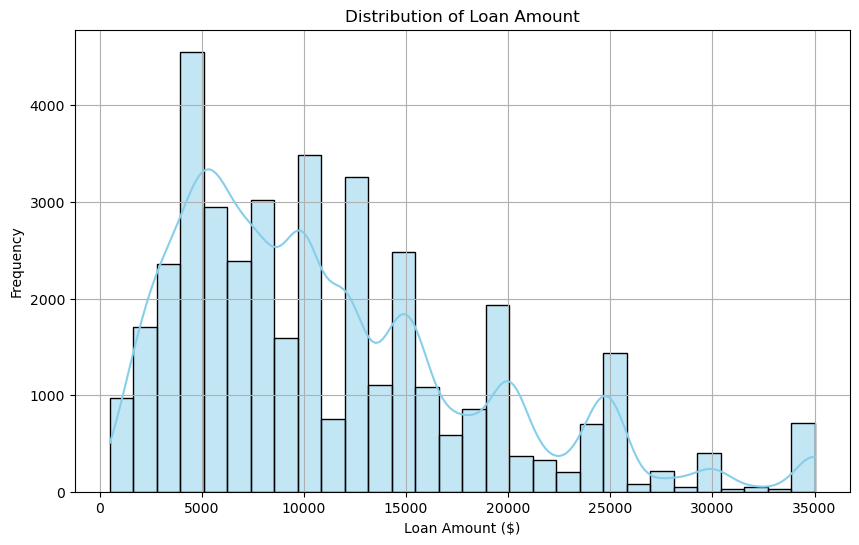

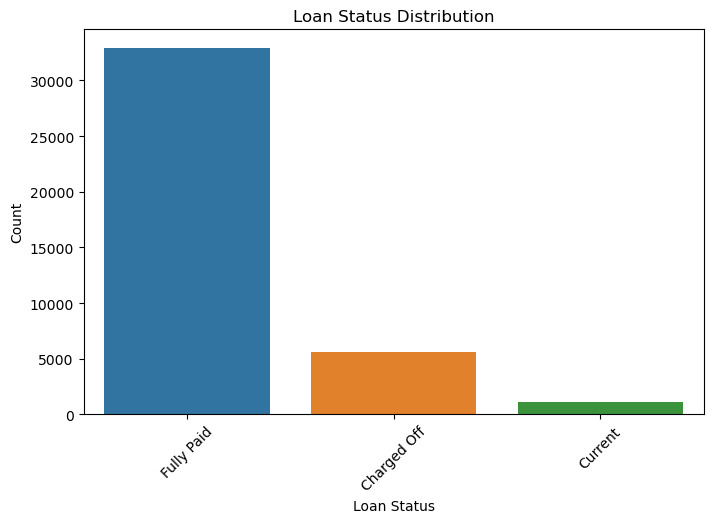

In [11]:
#4 - Univariate Analysis - Histogram of a Numerical Variable (e.g., loan amount)
plt.figure(figsize=(10, 6))
sns.histplot(data=loan_data, x='loan_amnt', bins=30, kde=True, color='skyblue')
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount ($)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#5- Univariate Analysis - Bar Chart of a Categorical Variable (e.g., loan status)
plt.figure(figsize=(8, 5))
sns.countplot(data=loan_data, x='loan_status')
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


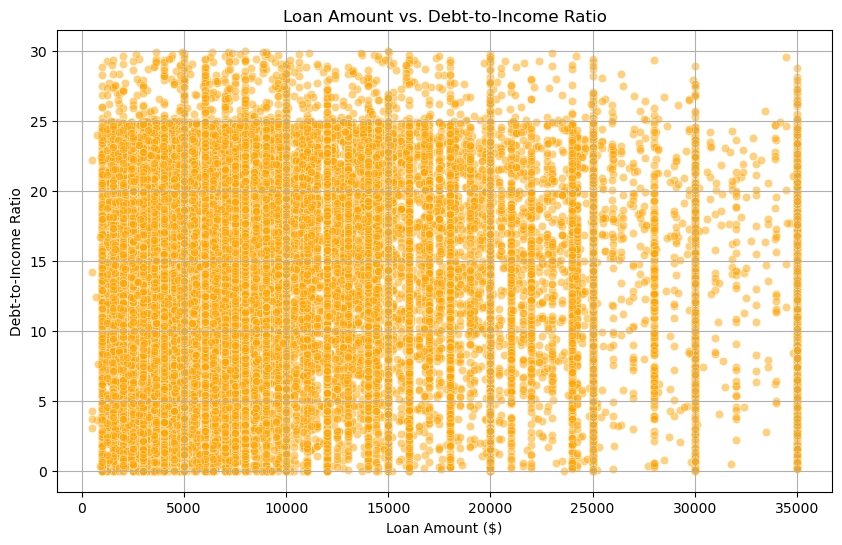

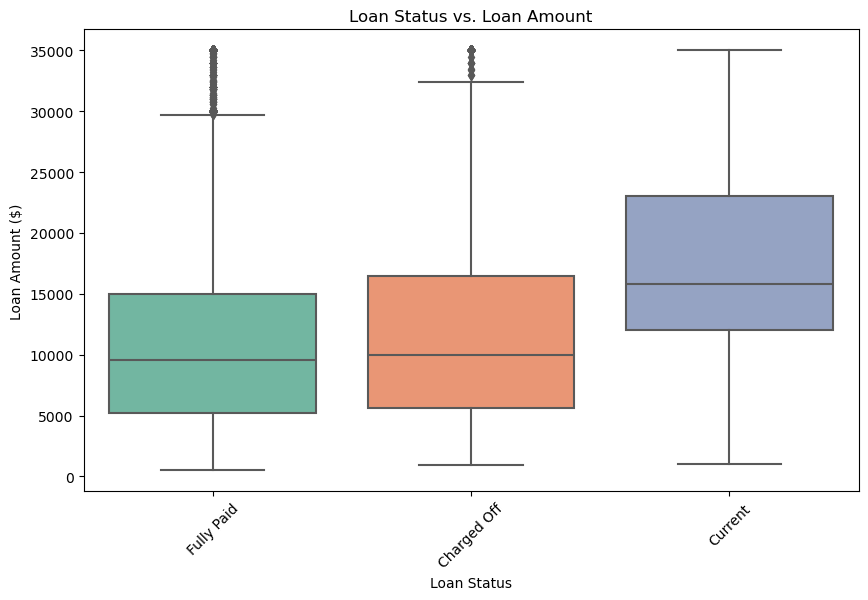

In [32]:
#7 - Bivariate Analysis
# Bivariate Analysis - Scatter Plot (e.g., loan amount vs. debt-to-income ratio)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=loan_data, x='loan_amnt', y='dti', alpha=0.5, color='orange')
plt.title('Loan Amount vs. Debt-to-Income Ratio')
plt.xlabel('Loan Amount ($)')
plt.ylabel('Debt-to-Income Ratio')
plt.grid(True)
plt.show()

#8 - Bivariate Analysis - Box Plot (e.g., loan status by loan amount)
plt.figure(figsize=(10, 6))
sns.boxplot(data=loan_data, x='loan_status', y='loan_amnt', palette='Set2')
plt.title('Loan Status vs. Loan Amount')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount ($)')
plt.xticks(rotation=45)
plt.show()
